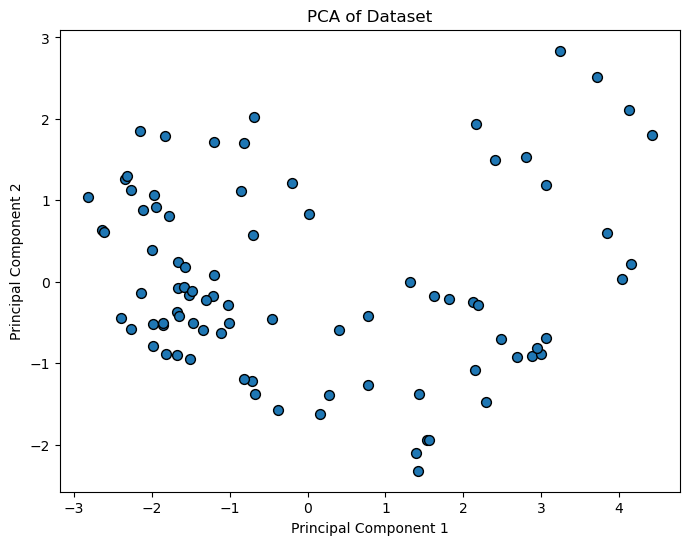

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load the Dataset
data_path = r"candy-data.csv"
df = pd.read_csv(data_path)

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# 2. Standardize the Data
scaler = StandardScaler()
X_std = scaler.fit_transform(df_numeric)

# 3. Calculate Covariance Matrix
cov_matrix = np.cov(X_std.T)

# 4. Find Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# 5. Choose the Number of Components
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Choose components to cover 95% variance

# 6. Transform the Data
principal_components = eigenvectors[:, :n_components]
X_pca = X_std.dot(principal_components)

# 7. Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()